In [27]:
from prevelop import preparation, exploration, clustering, evaluation

__Data Preparation and Preprocessing__

In [28]:
# Load the cad-data
cad_data = preparation.load_data(r"demo_data/CAPicard_cad_data_sample.xlsx")
# load process-data
process_data = preparation.load_data(r"demo_data/CAPicard_process_data_sample.xlsx")
# load link data
link_data = preparation.load_data(r"demo_data/CAPicard_link_data_sample.xlsx")

In [29]:
### clear data
# for cad-data received from SIMUS, apply the following cleaning steps
cad_data = preparation.clear_cad_data(cad_data)

In [30]:
### aggregate process data
process_data = preparation.aggregate_data(process_data, key='Teil', columns=['Aktivität','Basisressource','Produktionsmenge','Soll te','Soll tr'], methods=['encode','encode','mean','mean','mean'])

In [31]:
### prepare the data
# select numerical, binary and categorical columns for preprocessing
num_columns = ['L [mm]', 'B [mm]', 'H [mm]', 'Volumen [mm3]', 'Masse [kg]', 'Flächeninhalt [mm2]', 'Da max. [mm]', 'Di min. [mm]','Produktionsmenge','Soll te','Soll tr']
cat_columns = ['Klasse']
bin_columns = [column for column in process_data.columns if column != 'Teil' and column not in num_columns and column not in cat_columns]

data, data_preprocessed = preparation.prepare_data(cad_data, process_data, link_data, num_columns, bin_columns, cat_columns, key_cad='Zeichnung', key_process='Teil')

In [32]:
### extract data from nomennclature in column 'Teil'
data['Material'] = data.index.str[5:7]
data['Nr. of flights and direction'] = data.index.str[7]
data['Design'] = data.index.str[8]
data['Pitch'] = data.index.str[10:13]
data['Length'] = data.index.str[14:17]

# drop rows with non-numeric values in column 'Pitch' and 'Length'
data = data[data['Pitch'].str.isnumeric()]
data = data[data['Length'].str.isnumeric()]

# make values in columns 'Pitch' and 'Length' numeric
data['Pitch'] = data['Pitch'].astype(float)
data['Length'] = data['Length'].astype(float)

# drop rows with values in Nr of flights and direction not in [0,1,2,3,4,5,6]
data = data[data['Nr. of flights and direction'].isin(['0','1','2','3','4','5','6'])]

# drop rows with values in Design not in [0,1,2,3,4,5]
data = data[data['Design'].isin(['0','1','2','3','4','5'])]

In [33]:
### preprocess the data
# select numerical, binary and categorical columns for preprocessing
num_columns.append('Pitch')
num_columns.append('Length')
cat_columns.append('Material')
cat_columns.append('Nr. of flights and direction')
cat_columns.append('Design')

data_preprocessed = preparation.preprocessing(data, num_columns, bin_columns, cat_columns)

__Exploration__

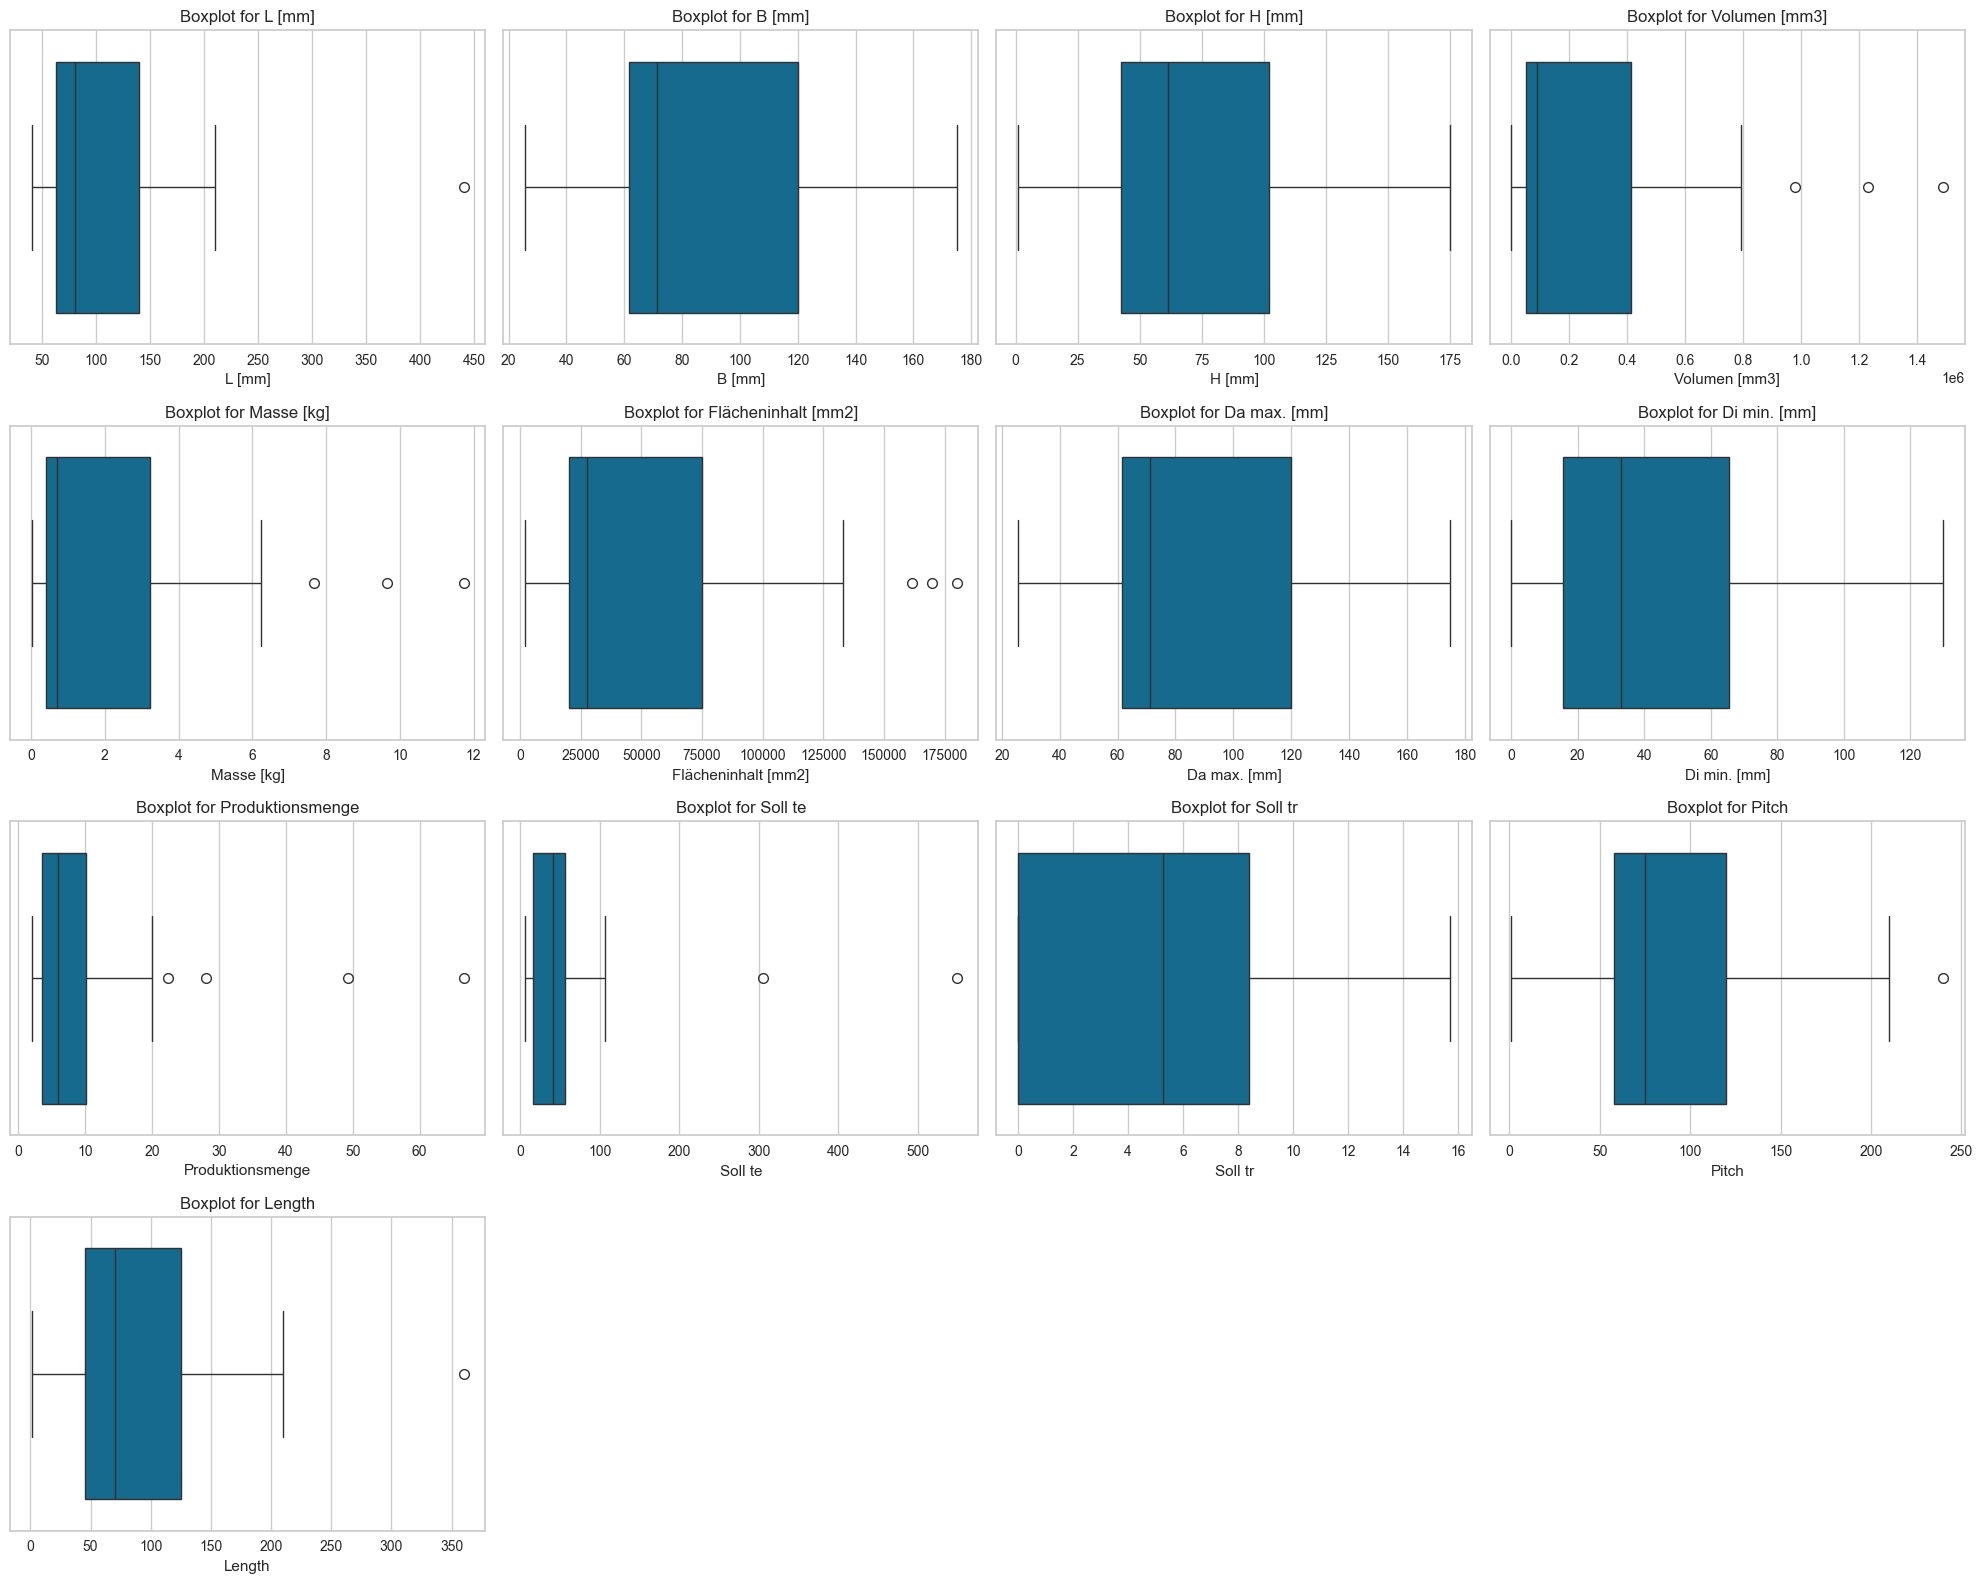

In [34]:
# show boxplots of the numerical columns
exploration.boxplots(data, num_columns)

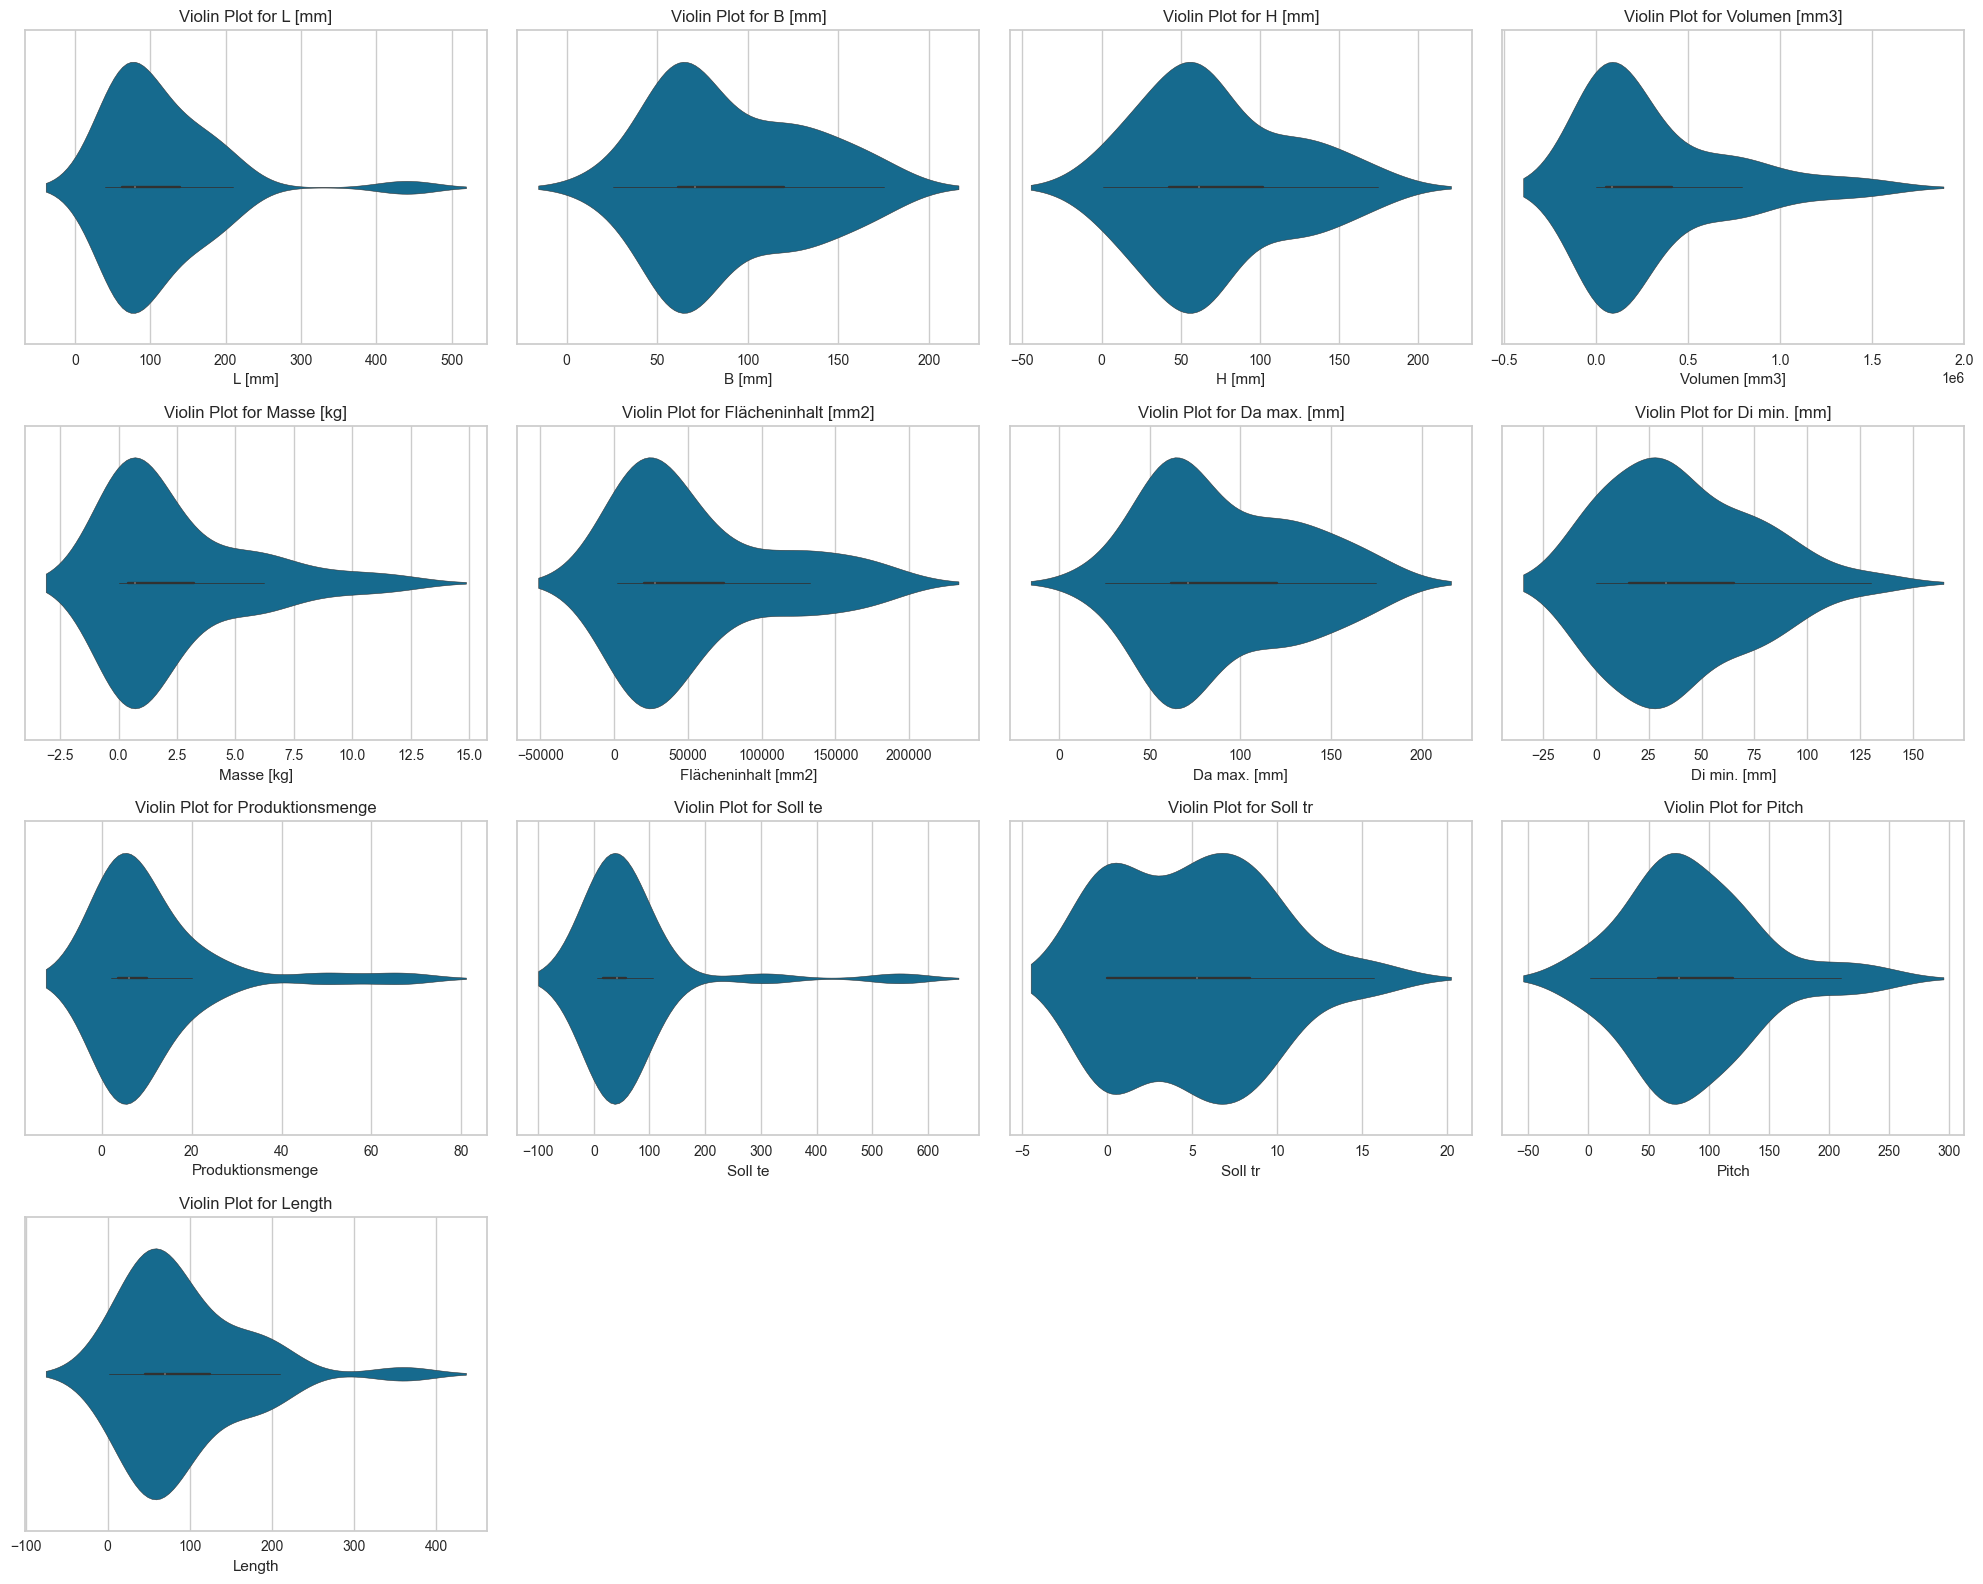

In [35]:
# show violonplot of data
exploration.violinplots(data, num_columns)

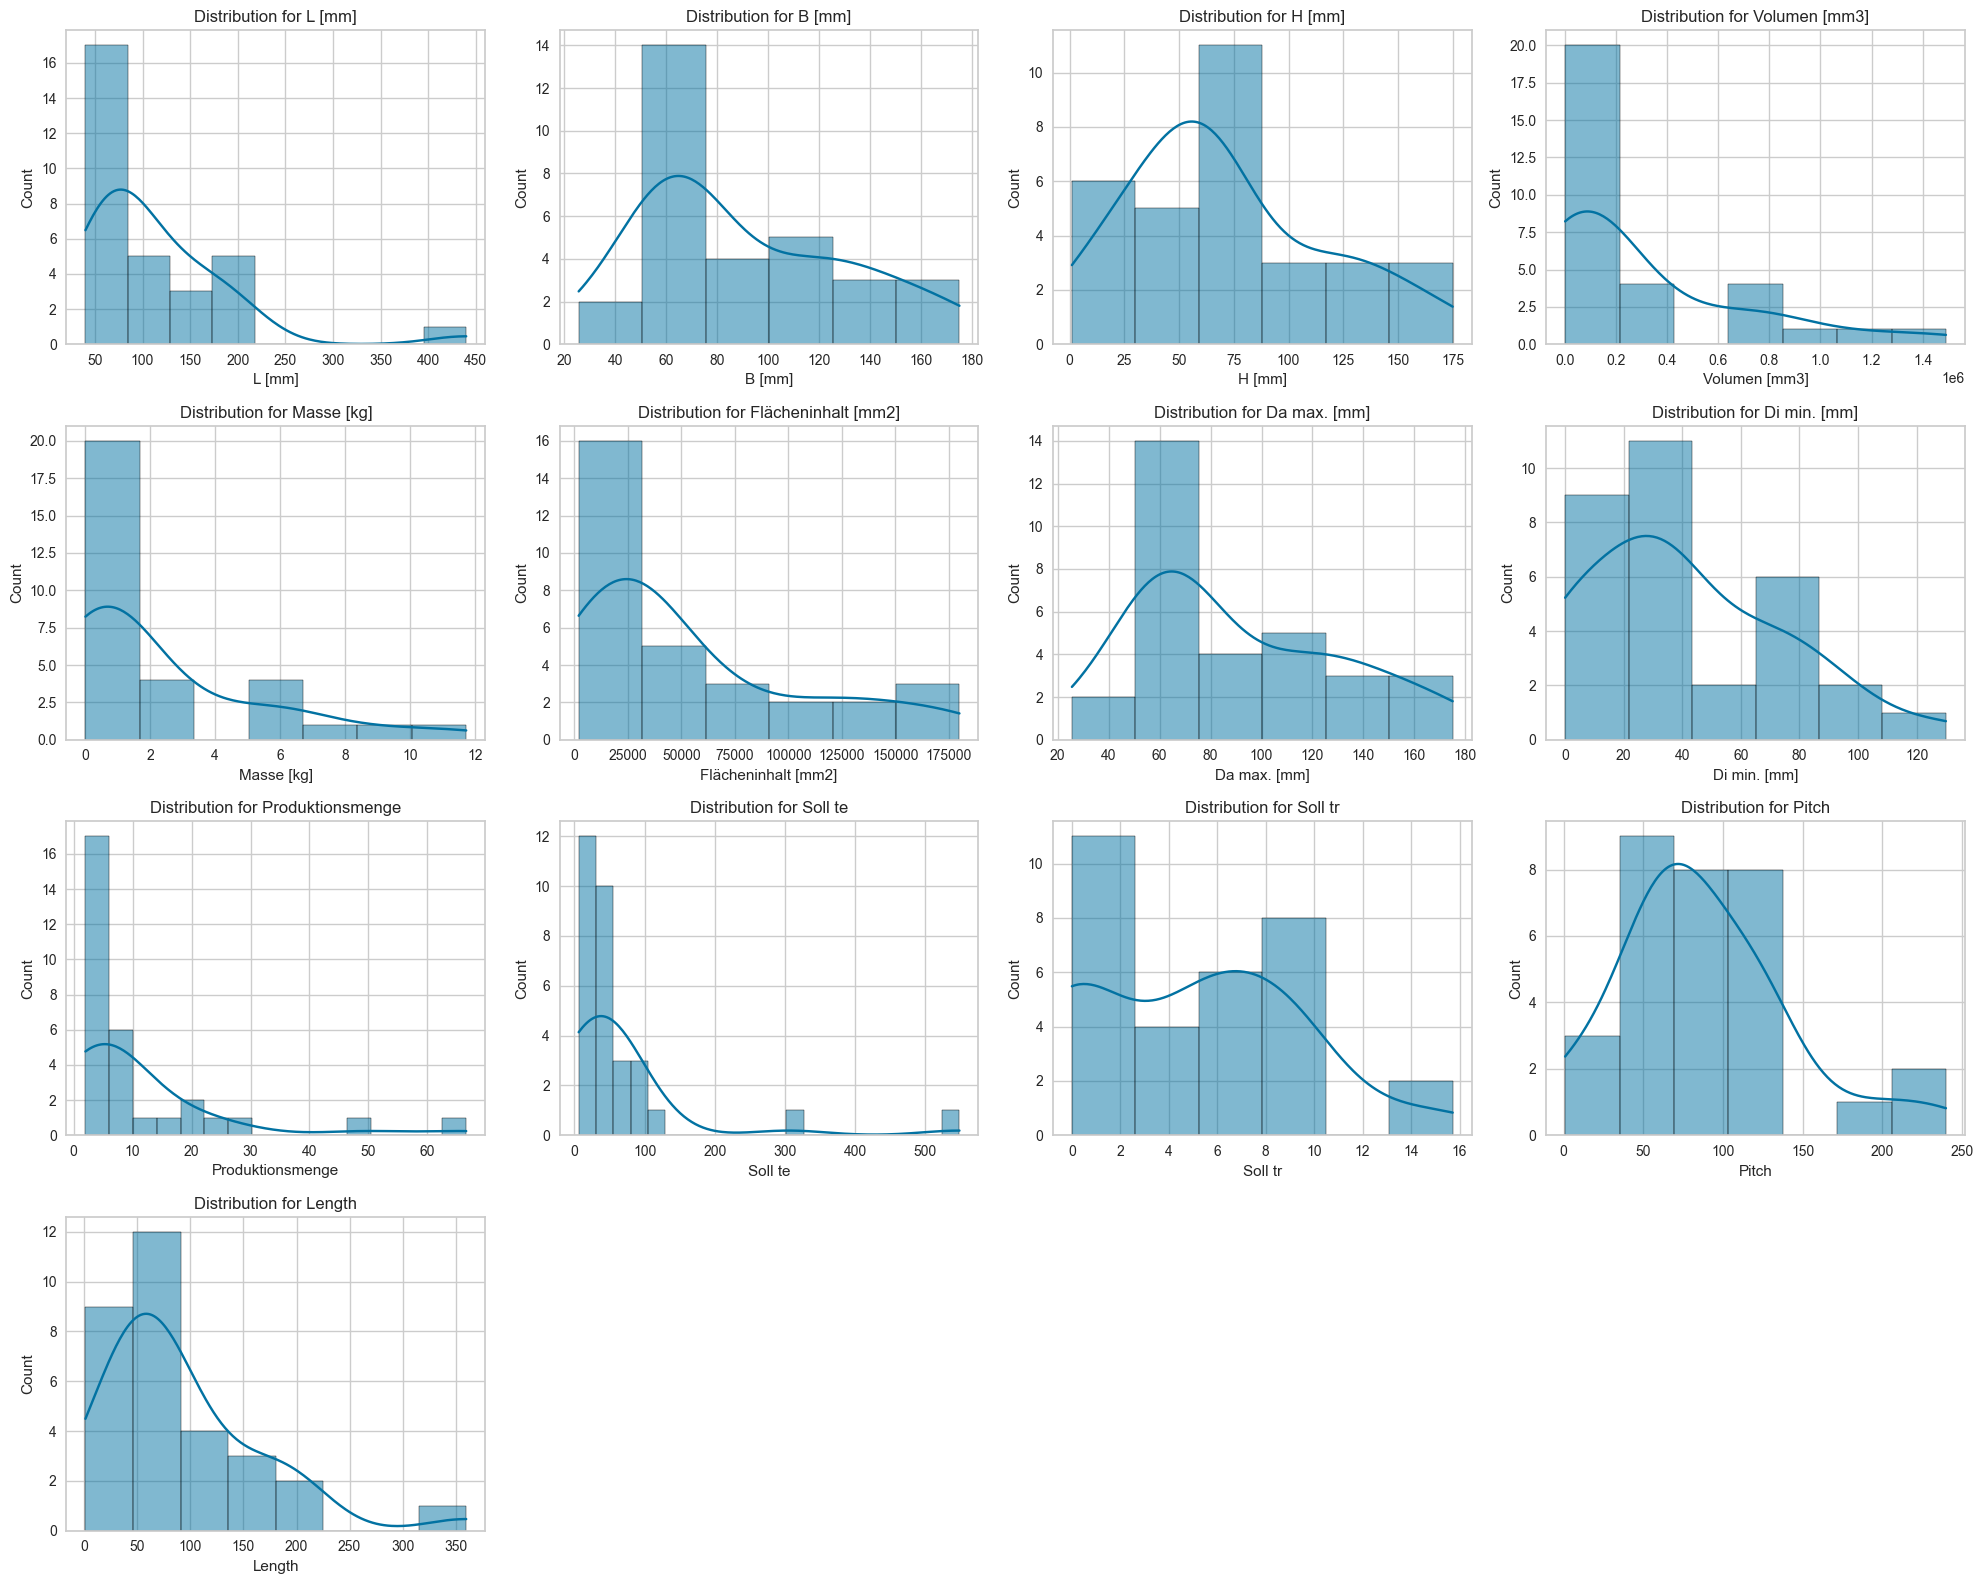

In [36]:
# show histograms of categorical columns
exploration.distributions(data, num_columns)

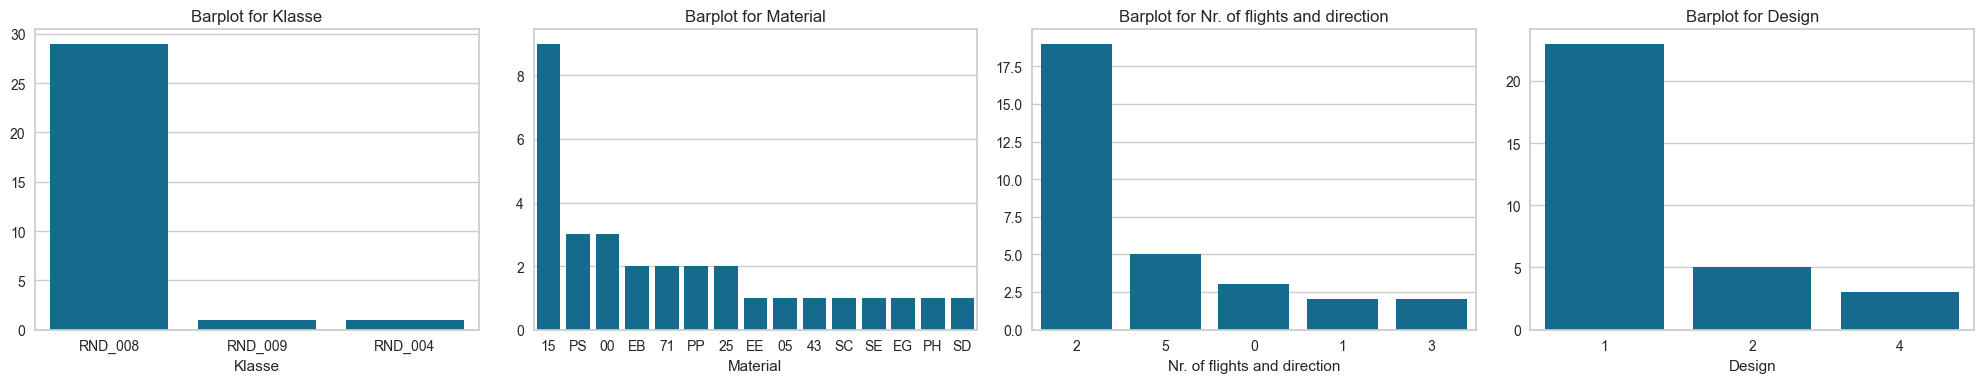

In [37]:
# show parallel_coordinates_plot of data
exploration.barplots(data, cat_columns)

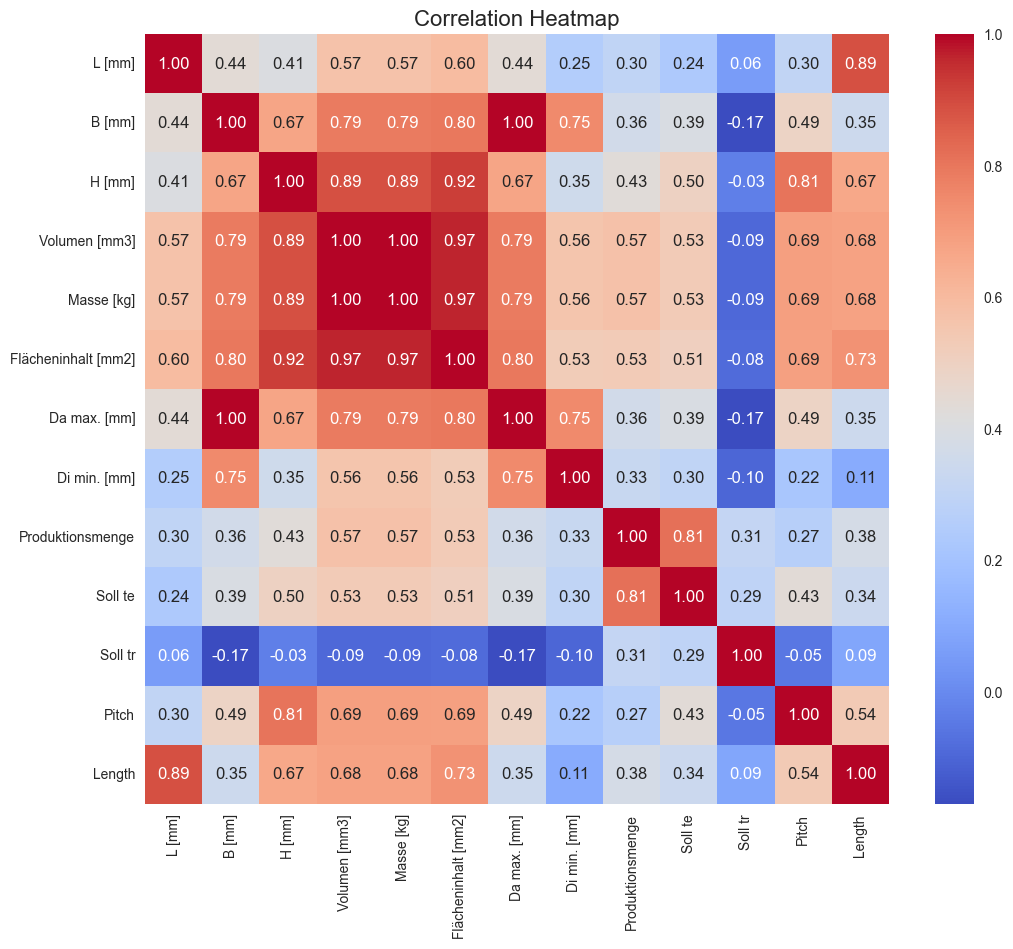

In [38]:
# show heatmap of data
exploration.heatmap(data[num_columns])

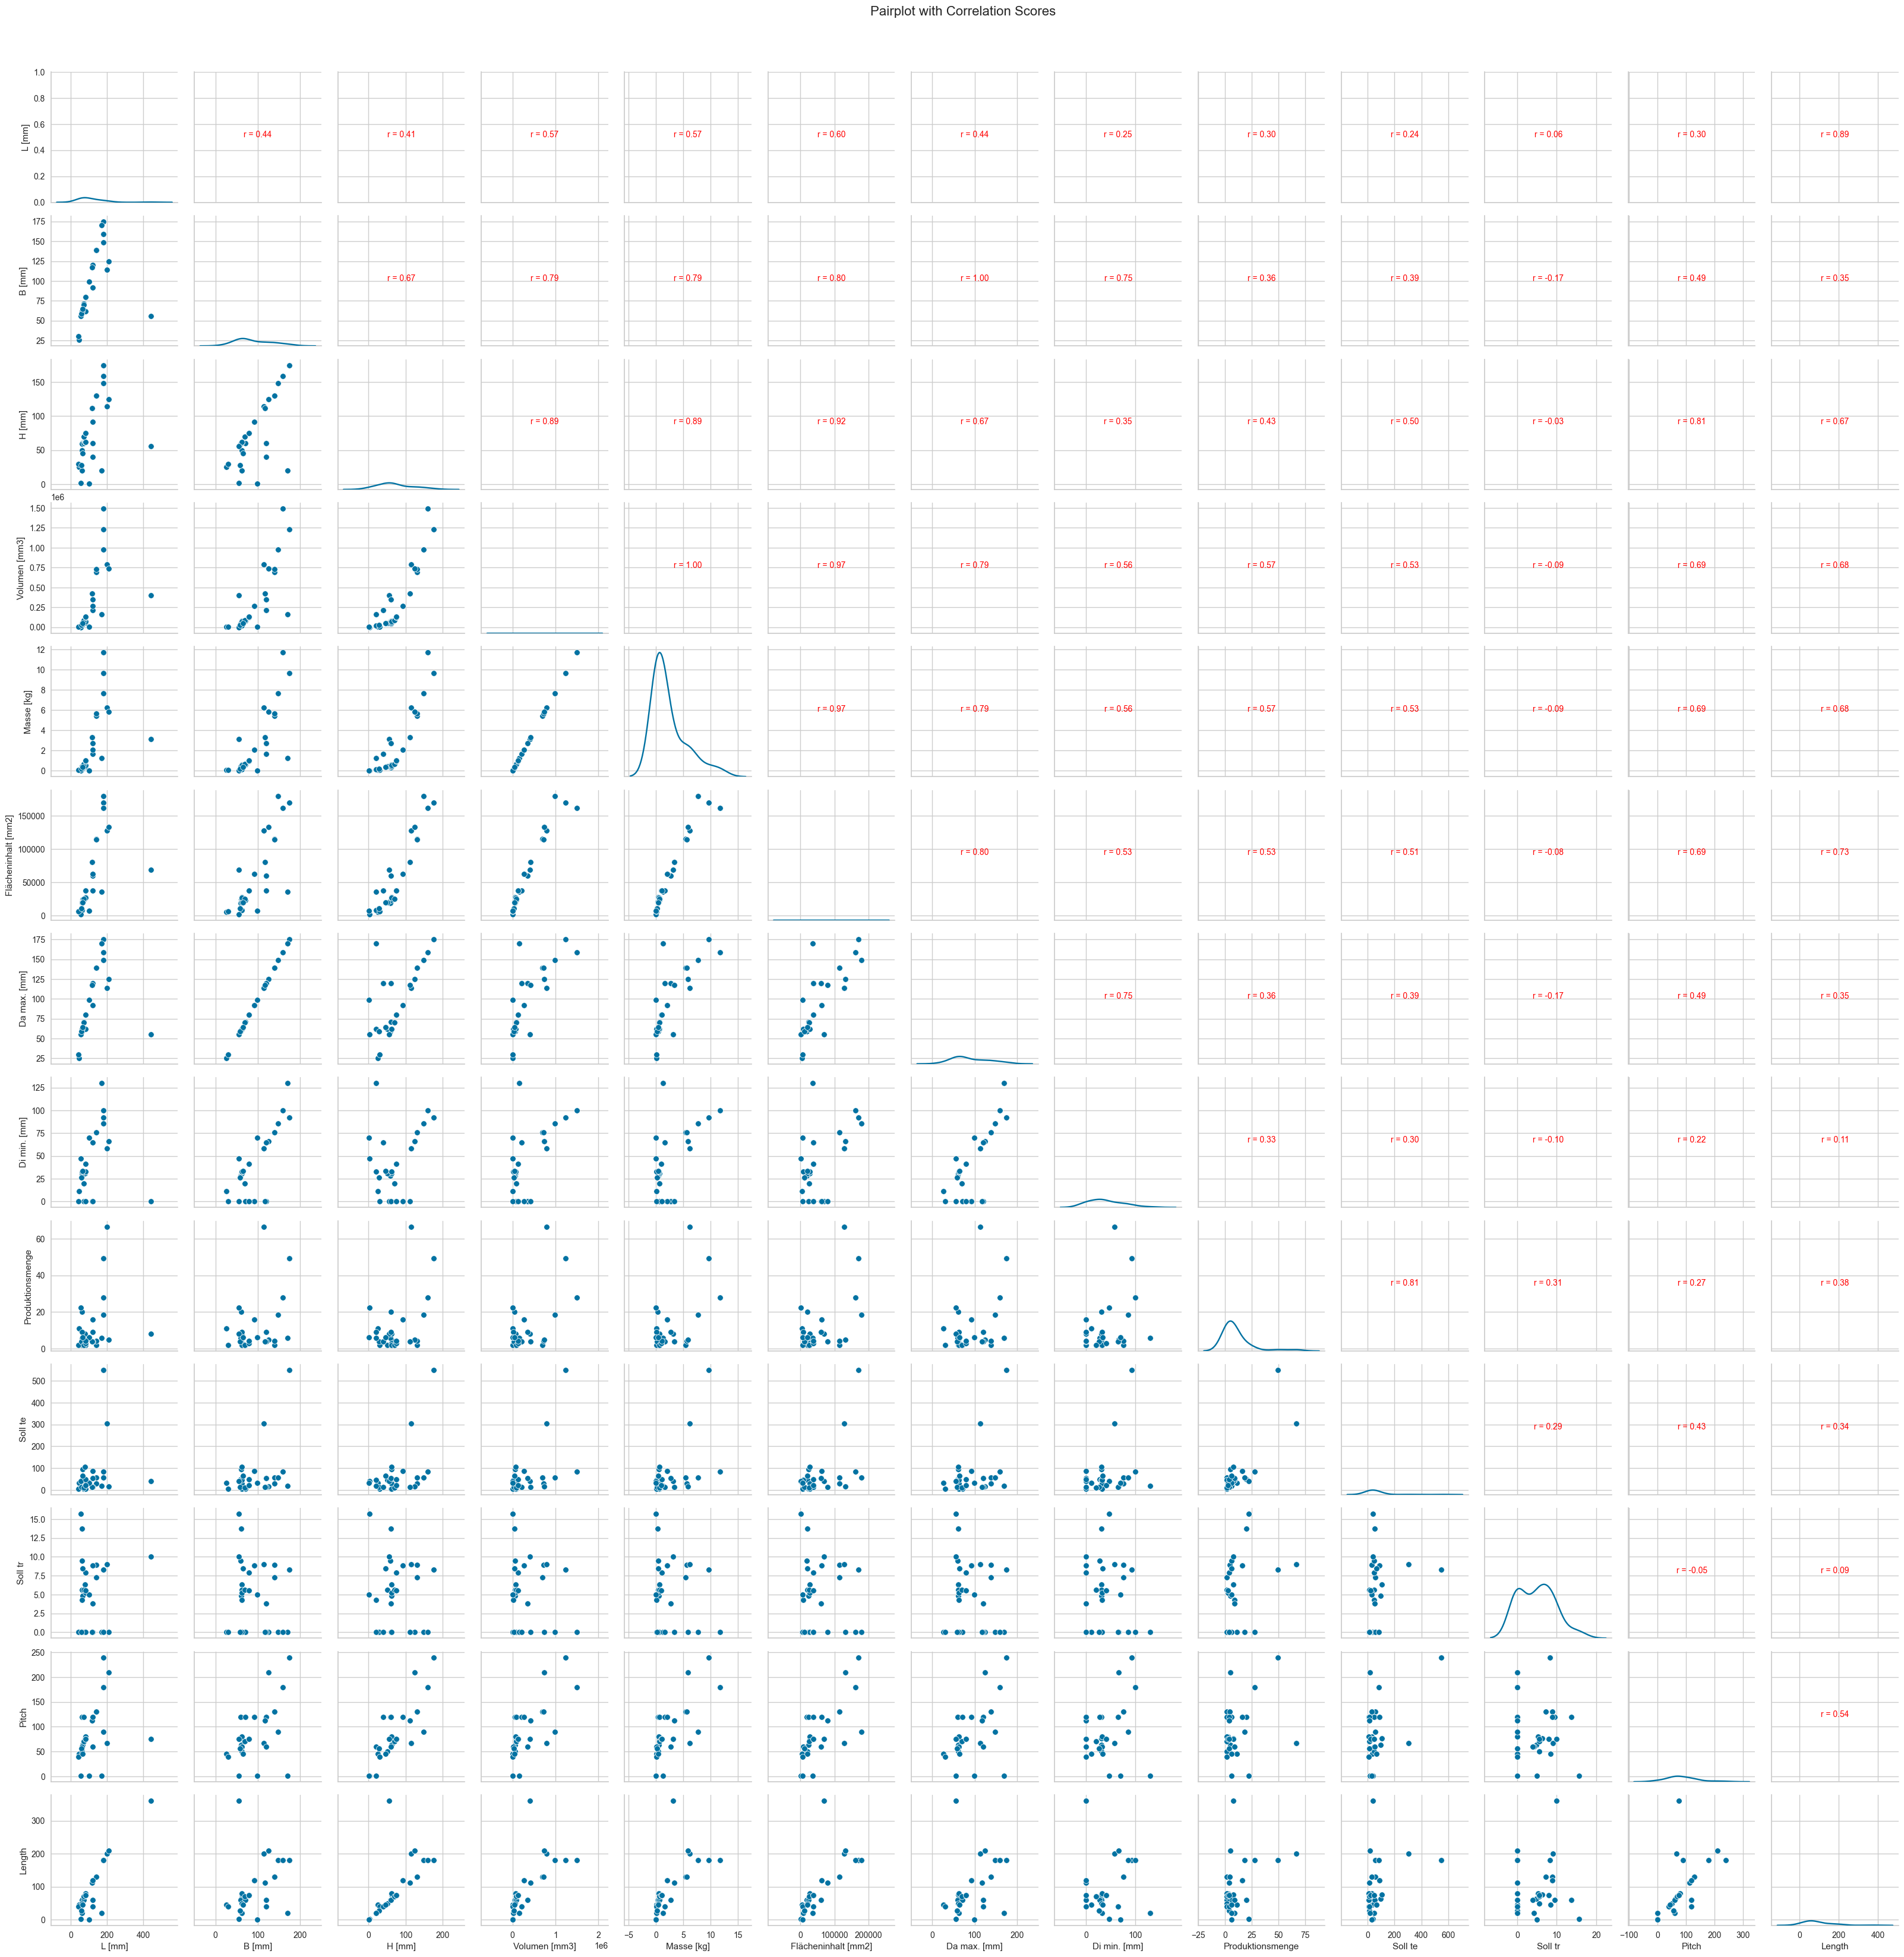

In [39]:
# show pairplot of data
exploration.pairplot(data, num_columns)

In [40]:
# z-score analysis of data
exploration.z_score_analysis(data, num_columns)

Klasse  Volumen [mm3]  Masse [kg]  Flächeninhalt [mm2]  \
Teil                                                                            
K114-1511-067-200-00  RND_008      792012.61       6.233             128081.6   
G175-EE21-240-180-25  RND_008     1229930.16       9.655             169652.1   
9070-0021-075-360-00  RND_004      402986.22       3.143              69098.8   
8159-1511-180-180-01  RND_008     1490660.51      11.731             161403.2   

                      L [mm]  B [mm]  H [mm]  Lrot [mm]  Da max. [mm]  \
Teil                                                                    
K114-1511-067-200-00   200.0  113.95  113.95      200.0        113.95   
G175-EE21-240-180-25   180.0  175.00  175.00      180.0        175.00   
9070-0021-075-360-00   440.0   55.50   55.50      440.0         55.50   
8159-1511-180-180-01   180.0  159.00  159.00      180.0        159.00   

                      Di min. [mm]  ...  Basisressource 492000.0  \
Teil                                ...                            
K114-1511-067-200-00          58.0  ...                        0   
G175-EE21-240-180-25          92.0  ...                        0   
9070-0021-075-360-00           0.0  ...                        0   
8159-1511-180-180-01         100.0  ...                        0   

                      Basisressource 201722.0  Produktionsmenge     Soll te  \
Teil                                                                          
K114-1511-067-200-00                        0         66.583658  305.674708   
G175-EE21-240-180-25                        0         49.333333  548.945455   
9070-0021-075-360-00                        0          8.000000   40.000000   
8159-1511-180-180-01                        0         28.000000   84.000000   

                        Soll tr  Material  Nr. of flights and direction  \
Teil                                                                      
K114-1511-067-200-00   9.046693        15                             1   
G175-EE21-240-180-25   8.333333        EE                             2   
9070-0021-075-360-00  10.000000        00                             2   
8159-1511-180-180-01   0.000000        15                             1   

                      Design  Pitch  Length  
Teil                                         
K114-1511-067-200-00       1   67.0   200.0  
G175-EE21-240-180-25       1  240.0   180.0  
9070-0021-075-360-00       1   75.0   360.0  
8159-1511-180-180-01       1  180.0   180.0  

[4 rows x 73 columns]

In [41]:
exploration.isolation_forest(data, num_columns)

Klasse  Volumen [mm3]  Masse [kg]  Flächeninhalt [mm2]  \
Teil                                                                            
K114-1511-067-200-00  RND_008      792012.61       6.233             128081.6   
G175-EE21-240-180-25  RND_008     1229930.16       9.655             169652.1   

                      L [mm]  B [mm]  H [mm]  Lrot [mm]  Da max. [mm]  \
Teil                                                                    
K114-1511-067-200-00   200.0  113.95  113.95      200.0        113.95   
G175-EE21-240-180-25   180.0  175.00  175.00      180.0        175.00   

                      Di min. [mm]  ...  Basisressource 492000.0  \
Teil                                ...                            
K114-1511-067-200-00          58.0  ...                        0   
G175-EE21-240-180-25          92.0  ...                        0   

                      Basisressource 201722.0  Produktionsmenge     Soll te  \
Teil                                                                          
K114-1511-067-200-00                        0         66.583658  305.674708   
G175-EE21-240-180-25                        0         49.333333  548.945455   

                       Soll tr  Material  Nr. of flights and direction  \
Teil                                                                     
K114-1511-067-200-00  9.046693        15                             1   
G175-EE21-240-180-25  8.333333        EE                             2   

                      Design  Pitch  Length  
Teil                                         
K114-1511-067-200-00       1   67.0   200.0  
G175-EE21-240-180-25       1  240.0   180.0  

[2 rows x 73 columns]

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


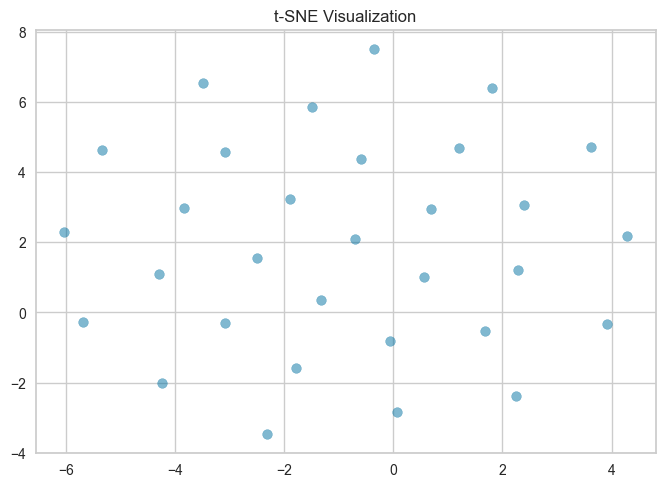

In [42]:
exploration.tsne_visualization(data, num_columns)

__Clustering__

In [43]:
distance_matrix = clustering.gower_distance(data)

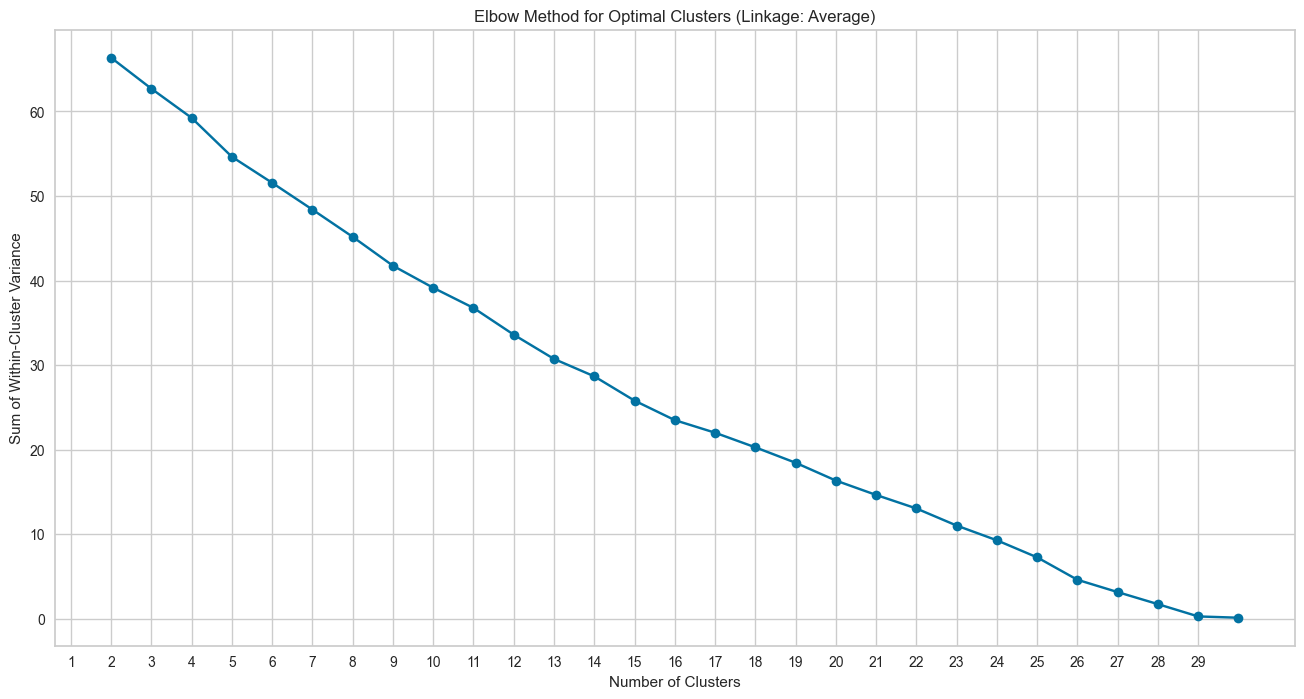

In [44]:
### plot the elbow plot for the first 20 clusters
clustering.elbow_plot_agglomerative(data_preprocessed, distance_matrix, 30)

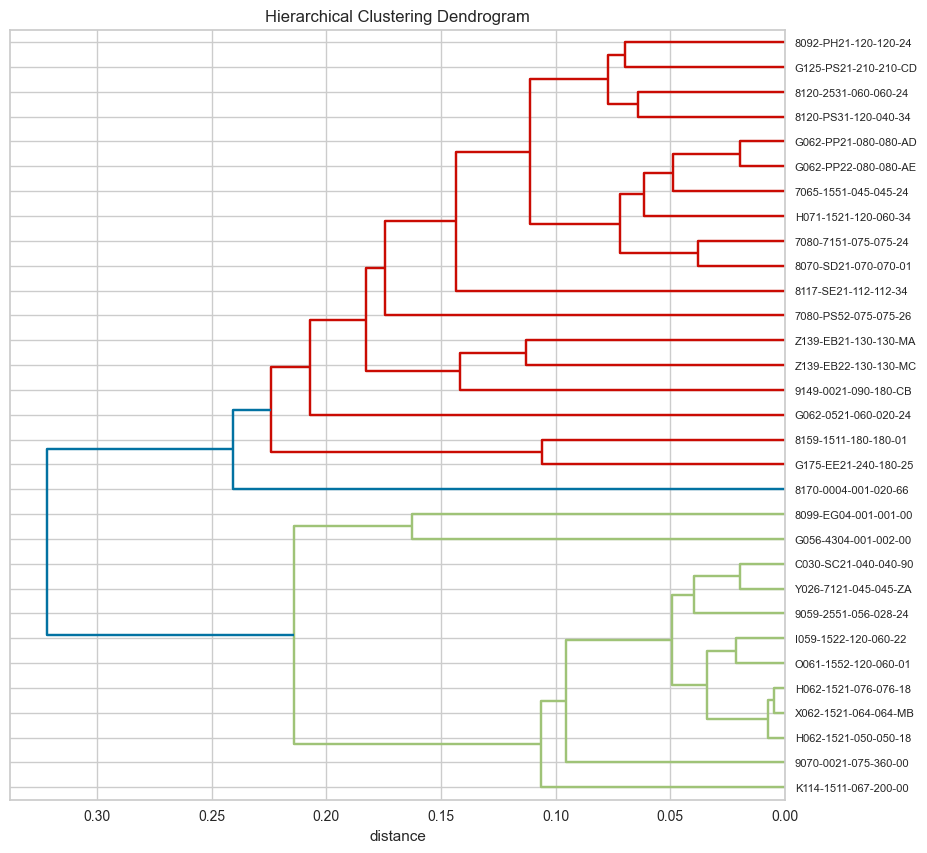

In [45]:
### plot the dendrogram
clustering.plot_dendrogram(distance_matrix, labels=data.index, orientation='left')

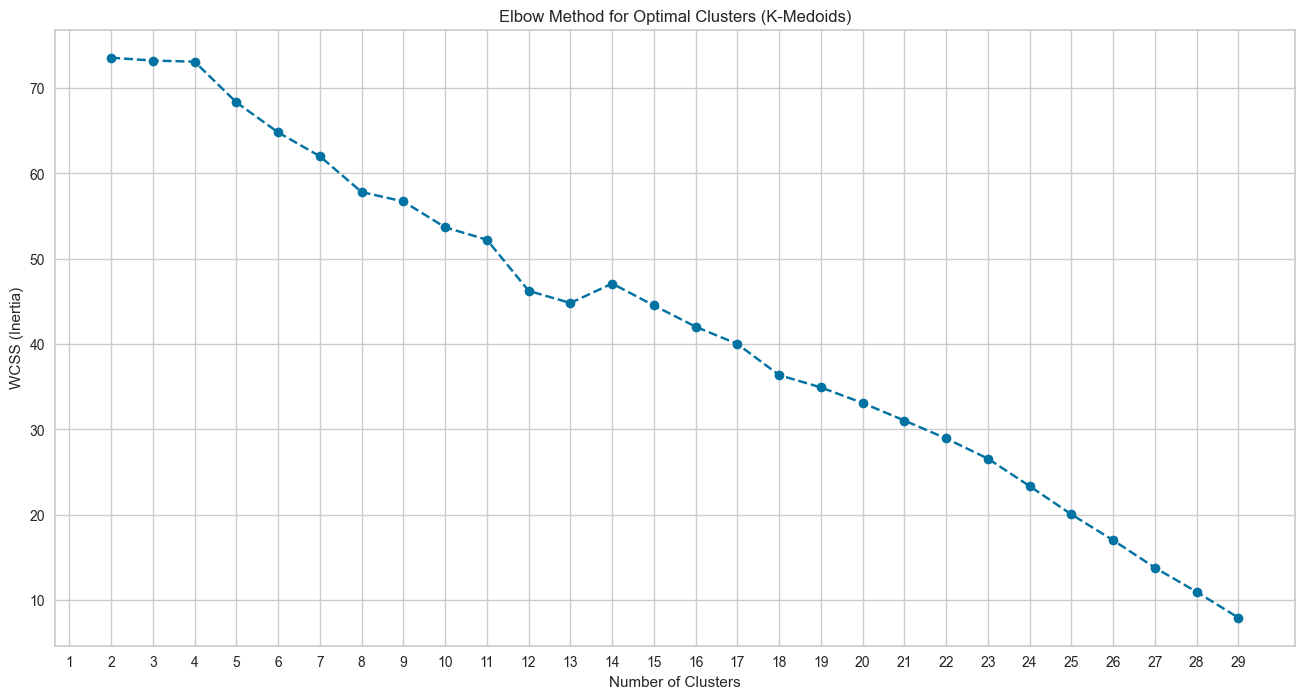

In [46]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.elbow_plot_kmedoids(data_preprocessed, 30)

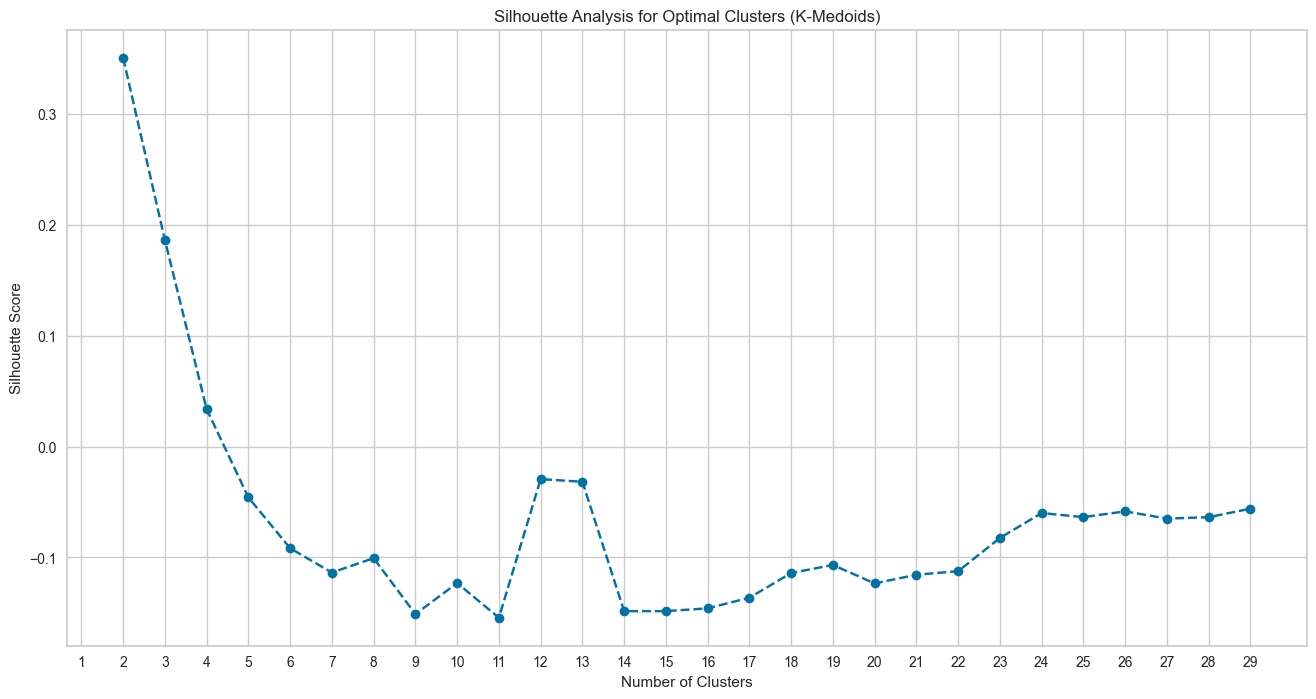

In [47]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.silhouette_score_kmedoids(data_preprocessed, 30)

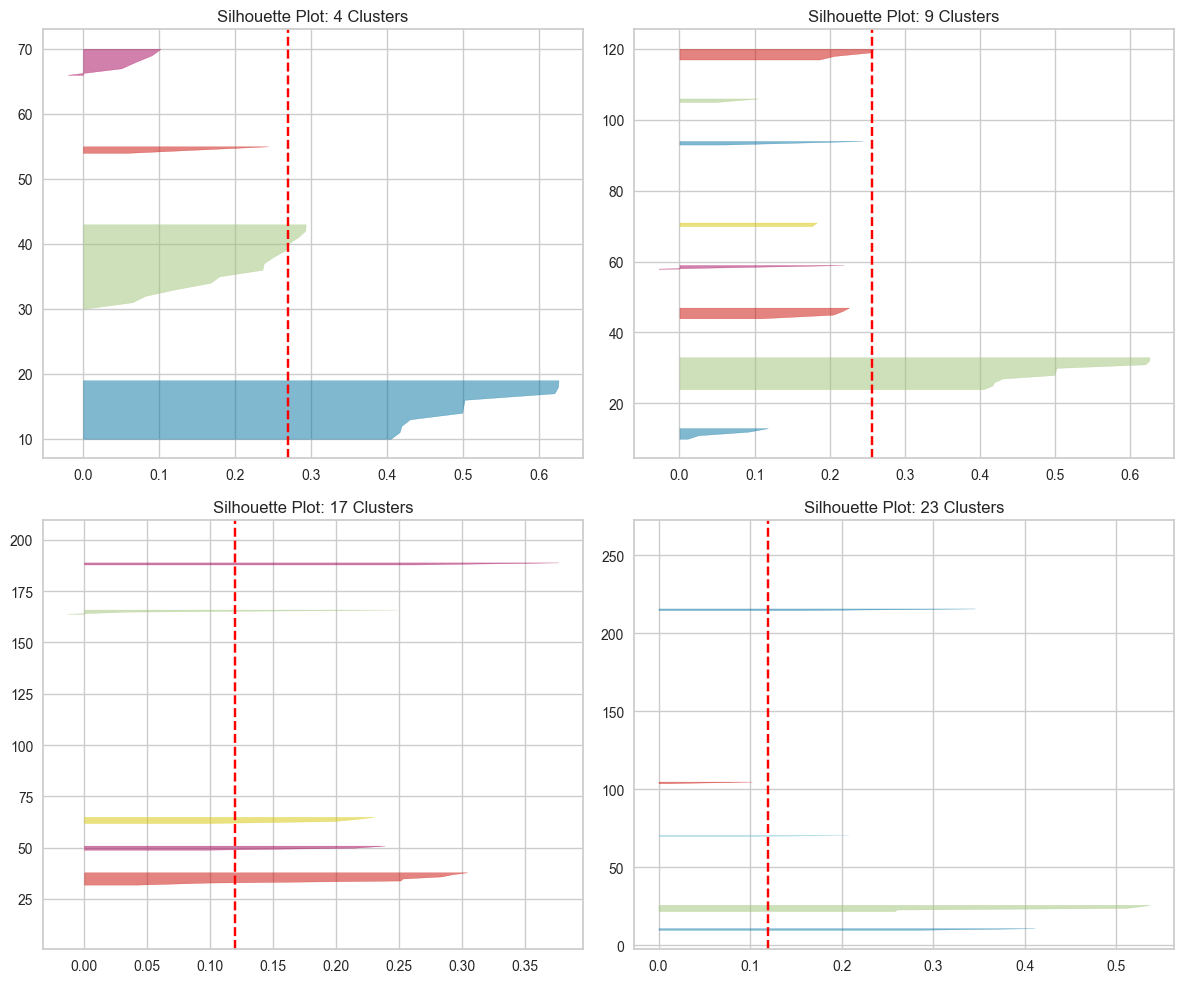

In [ ]:
clustering.silhouette_plot_kmedoids(data_preprocessed, [4,9,17,23])

In [49]:
### tune min_cluster size for HDBSCAN
min_size_range = range(2, 10)
clustering.tune_min_cluster_size(distance_matrix, min_size_range)

{2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2}

In [50]:
### tune min_samples for HDBSCAN
min_samples_range = range(1, 10)
clustering.tune_min_samples(distance_matrix, min_samples_range, min_cluster_size=6)

{1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2}

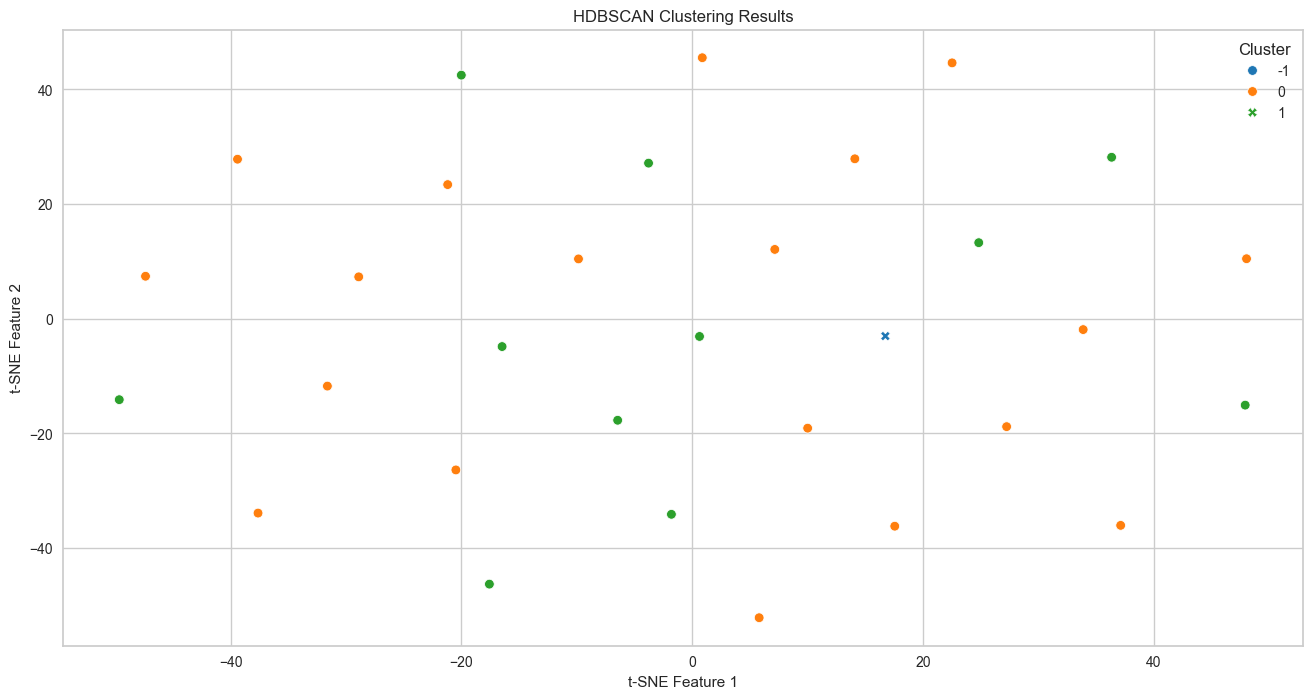

In [51]:
### Perform HDBSCAN clustering with optimal parameters
labels, clusterer = clustering.hdbscan_clustering(distance_matrix, min_cluster_size=2, min_samples=2)
### Visualize the results
clustering.plot_hdbscan_results_2d(data_preprocessed.values, labels)

__Evaluation__

In [52]:
# feature importance
clusters = clustering.agglomerative_clustering(distance_matrix, 29)
evaluation.feature_importance(data_preprocessed, clusters)